In [102]:
#Import all the relevant modules

import pandas as pd
import numpy as np
import seaborn as sns

import geopandas as gpd
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure

import plotly.figure_factory as ff

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import squarify
from collections import defaultdict, Counter

In [2]:
#Import the dataset

df  = pd.read_csv("/Users/bhavyakandhari/Downloads/movies.csv")

In [3]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

# Exploratory Data Analysis 

Basic Overview of data

In [4]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

Number of rows and columns

In [5]:
rows, columns = df.shape
print("Number of rows:",rows)
print("Number of columns:",columns)

Number of rows: 7668
Number of columns: 15


Check how many year's of movies data is present

In [7]:
df.groupby(['year']).count()

name  rating  genre  released  score  votes  director  writer  star  \
year                                                                        
1980    92      90     92        92     92     92        92      92    92   
1981   113     112    113       113    113    113       113     113   113   
1982   126     125    126       126    126    126       126     126   126   
1983   144     142    144       144    144    144       144     144   143   
1984   168     166    168       168    168    168       168     168   168   
1985   200     198    200       200    200    200       200     200   200   
1986   200     198    200       200    200    200       200     200   200   
1987   200     198    200       200    200    200       200     200   200   
1988   200     199    200       200    200    200       200     200   200   
1989   200     199    200       200    200    200       200     200   200   
1990   200     199    200       200    200    200       200     199   200   
1991   200     198    200       200    200    200       200     200   200   
1992   200     198    200       200    200    200       200     200   200   
1993   200     197    200       200    200    200       200     200   200   
1994   200     200    200       200    200    200       200     200   200   
1995   200     199    200       200    200    200       200     200   200   
1996   200     199    200       200    200    200       200     200   200   
1997   200     197    200       200    200    200       200     200   200   
1998   200     198    200       200    200    200       200     200   200   
1999   200     198    200       200    200    200       200     200   200   
2000   200     196    200       200    200    200       200     200   200   
2001   200     197    200       200    200    200       200     200   200   
2002   200     200    200       200    200    200       200     200   200   
2003   200     197    200       200    200    200       200     200   200   
2004   200     199    200       200    200    200       200     200   200   
2005   200     200    200       200    200    200       200     200   200   
2006   200     200    200       200    200    200       200     200   200   
2007   200     199    200       200    200    200       200     200   200   
2008   200     200    200       200    200    200       200     200   200   
2009   200     200    200       200    200    200       200     200   200   
2010   200     200    200       198    200    200       200     199   200   
2011   200     200    200       200    200    200       200     200   200   
2012   200     200    200       200    200    200       200     200   200   
2013   200     200    200       200    200    200       200     200   200   
2014   200     200    200       200    200    200       200     200   200   
2015   200     197    200       200    200    200       200     200   200   
2016   200     199    200       200    200    200       200     200   200   
2017   200     199    200       200    200    200       200     200   200   
2018   200     199    200       200    200    200       200     200   200   
2019   200     183    200       200    200    200       200     200   200   
2020    25      16     25        25     22     22        25      24    25   

      country  budget  gross  company  runtime  
year                                            
1980       92      47     81       92       92  
1981      113      68    104      113      113  
1982      126      74    119      126      126  
1983      144      89    128      141      144  
1984      168      91    158      167      168  
1985      200      98    177      200      200  
1986      200     101    186      198      200  
1987      200     108    188      200      200  
1988      200     133    191      200      200  
1989      200     119    189      197      200  
1990      200     113    191      199      200  
1991      200     116    196      200      200  
1992    

Information about our Dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Numerical Feature Description

In [26]:
df.describe().T

count          mean           std     min         25%         50%  \
year     7668.0  2.000405e+03  1.115351e+01  1980.0      1991.0      2000.0   
score    7665.0  6.390411e+00  9.688416e-01     1.9         5.8         6.5   
votes    7665.0  8.810850e+04  1.633238e+05     7.0      9100.0     33000.0   
budget   5497.0  3.558988e+07  4.145730e+07  3000.0  10000000.0  20500000.0   
gross    7479.0  7.850054e+07  1.657251e+08   309.0   4532055.5  20205757.0   
runtime  7664.0  1.072616e+02  1.858125e+01    55.0        95.0       104.0   

                75%           max  
year         2010.0  2.020000e+03  
score           7.1  9.300000e+00  
votes       93000.0  2.400000e+06  
budget   45000000.0  3.560000e+08  
gross    76016691.5  2.847246e+09  
runtime       116.0  3.660000e+02

Check for missing values

In [9]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

Check for outlier in budget and gross

<Axes: >

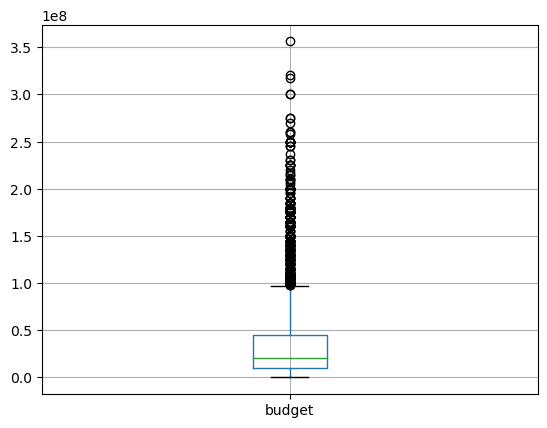

In [10]:
df.boxplot(column=['budget'])

<Axes: >

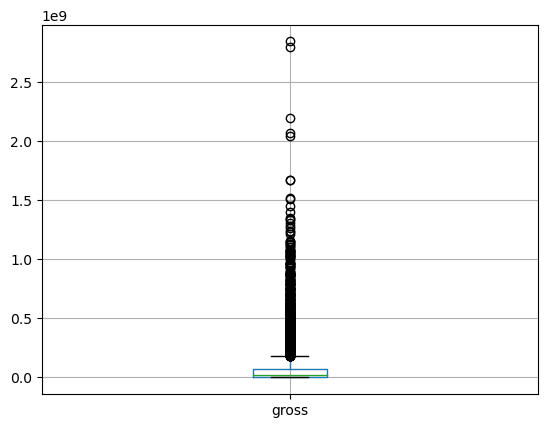

In [11]:
df.boxplot(column=['gross'])

Drop Duplicates

In [12]:
df.drop_duplicates()

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

Oldest and Newest Released Movies

In [28]:
old = df.sort_values("released", ascending = True)
old[['name', "released"]][:10]

name              released
201                      Longshot  1981 (United States)
312          Five Days One Summer          1982 (Japan)
786                  Taipei Story         1985 (Taiwan)
800               O.C. and Stiggs  1985 (United States)
1173  The House on Carroll Street  1987 (United States)
1825    Strangers in Good Company         1990 (Canada)
1820                   The Garden  1990 (United States)
2816            The White Balloon           1995 (Iran)
6413             Romeo and Juliet  2013 (United States)
4187                       Dahmer  2019 (United States)

In [29]:
new = df.sort_values("released", ascending = False)
new[['name', "released"]][:10]

name                            released
6922                            Sully   September 9, 2016 (United States)
6988                       Anthropoid  September 9, 2016 (United Kingdom)
5862                          Warrior   September 9, 2011 (United States)
5867                        Contagion   September 9, 2011 (United States)
5962  Bucky Larson: Born to Be a Star   September 9, 2011 (United States)
5547                                9   September 9, 2009 (United States)
4717       The Exorcism of Emily Rose   September 9, 2005 (United States)
4826                          The Man   September 9, 2005 (United States)
4819                           Asylum  September 9, 2005 (United Kingdom)
4662           Green Street Hooligans  September 9, 2005 (United Kingdom)

Sort the data by budget

In [14]:
df.sort_values(by=['budget'], inplace=False, ascending=False)

name     rating   genre  year  \
7445                         Avengers: Endgame      PG-13  Action  2019   
7244                    Avengers: Infinity War      PG-13  Action  2018   
7075   Star Wars: Episode VIII - The Last Jedi      PG-13  Action  2017   
7066                            Justice League      PG-13  Action  2017   
5060  Pirates of the Caribbean: at World's End      PG-13  Action  2007   
...                                        ...        ...     ...   ...   
7657                                      Leap        NaN   Drama  2020   
7659                                 I Am Fear  Not Rated  Horror  2020   
7660                          Aloha Surf Hotel        NaN  Comedy  2020   
7664                               Dream Round        NaN  Comedy  2020   
7667                                 Tee em el        NaN  Horror  2020   

                                released  score     votes            director  \
7445      April 26, 2019 (United States)    8.4  903000.0       Anthony Russo   
7244      April 27, 2018 (United States)    8.4  897000.0       Anthony Russo   
7075   December 15, 2017 (United States)    7.0  581000.0        Rian Johnson   
7066   November 17, 2017 (United States)    6.1  418000.0         Zack Snyder   
5060        May 25, 2007 (United States)    7.1  608000.0      Gore Verbinski   
...                                  ...    ...       ...                 ...   
7657  September 25, 2020 (United States)    6.7     903.0   Peter Ho-Sun Chan   
7659       March 3, 2020 (United States)    3.4     447.0       Kevin Shulman   
7660    November 5, 2020 (United States)    7.1      14.0  Stefan C. Schaefer   
7664    February 7, 2020 (United States)    4.7      36.0        Dusty Dukatz   
7667     August 19, 2020 (United States)    5.7       7.0        Pereko Mosia   

                  writer               star        country       budget  \
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
7075        Rian Johnson       Daisy Ridley  United States  317000000.0   
7066        Jerry Siegel        Ben Affleck  United States  300000000.0   
5060         Ted Elliott        Johnny Depp  United States  300000000.0   
...                  ...                ...            ...          ...   
7657            Ji Zhang            Gong Li          China          NaN   
7659       Kevin Shulman     Kristina Klebe  United States          NaN   
7660  Stefan C. Schaefer        Augie Tulba  United States          NaN   
7664         Lisa Huston   Michael Saquella  United States          NaN   
7667        Pereko Mosia   Siyabonga Mabaso   South Africa          NaN   

             gross                    company  runtime  
7445  2.797501e+09             Marvel Studios    181.0  
7244  2.048360e+09             Marvel Studios    149.0  
7075  1.332699e+09       Walt Disney Pictures    152.0  
7066  6.579270e+08               Warner Bros.    120.0  
5060  9.609965e+08       Walt Disney Pictures    169.0  
...            ...                        ...      ...  
7657  2.581888e+07                        NaN    135.0  
7659  1.326600e+04              Roxwell Films     87.0  
7660           NaN        Abominable Pictures     90.0  
7664           NaN  Cactus Blue Entertainment     90.0  
7667           NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

<Axes: xlabel='gross', ylabel='budget'>

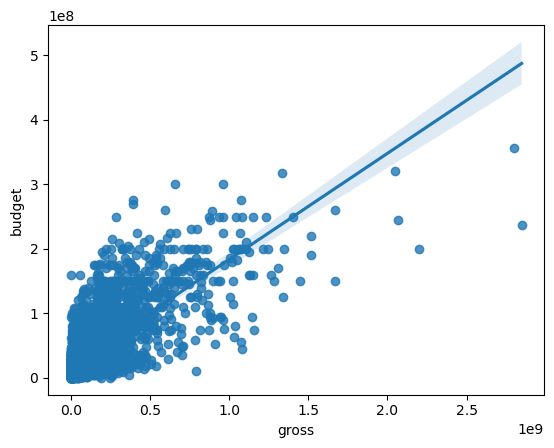

In [15]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

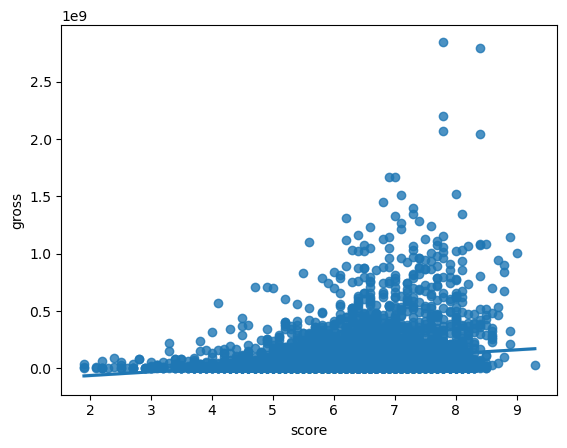

In [16]:
sns.regplot(x="score", y="gross", data=df)

# Top Movies based on different dataset features

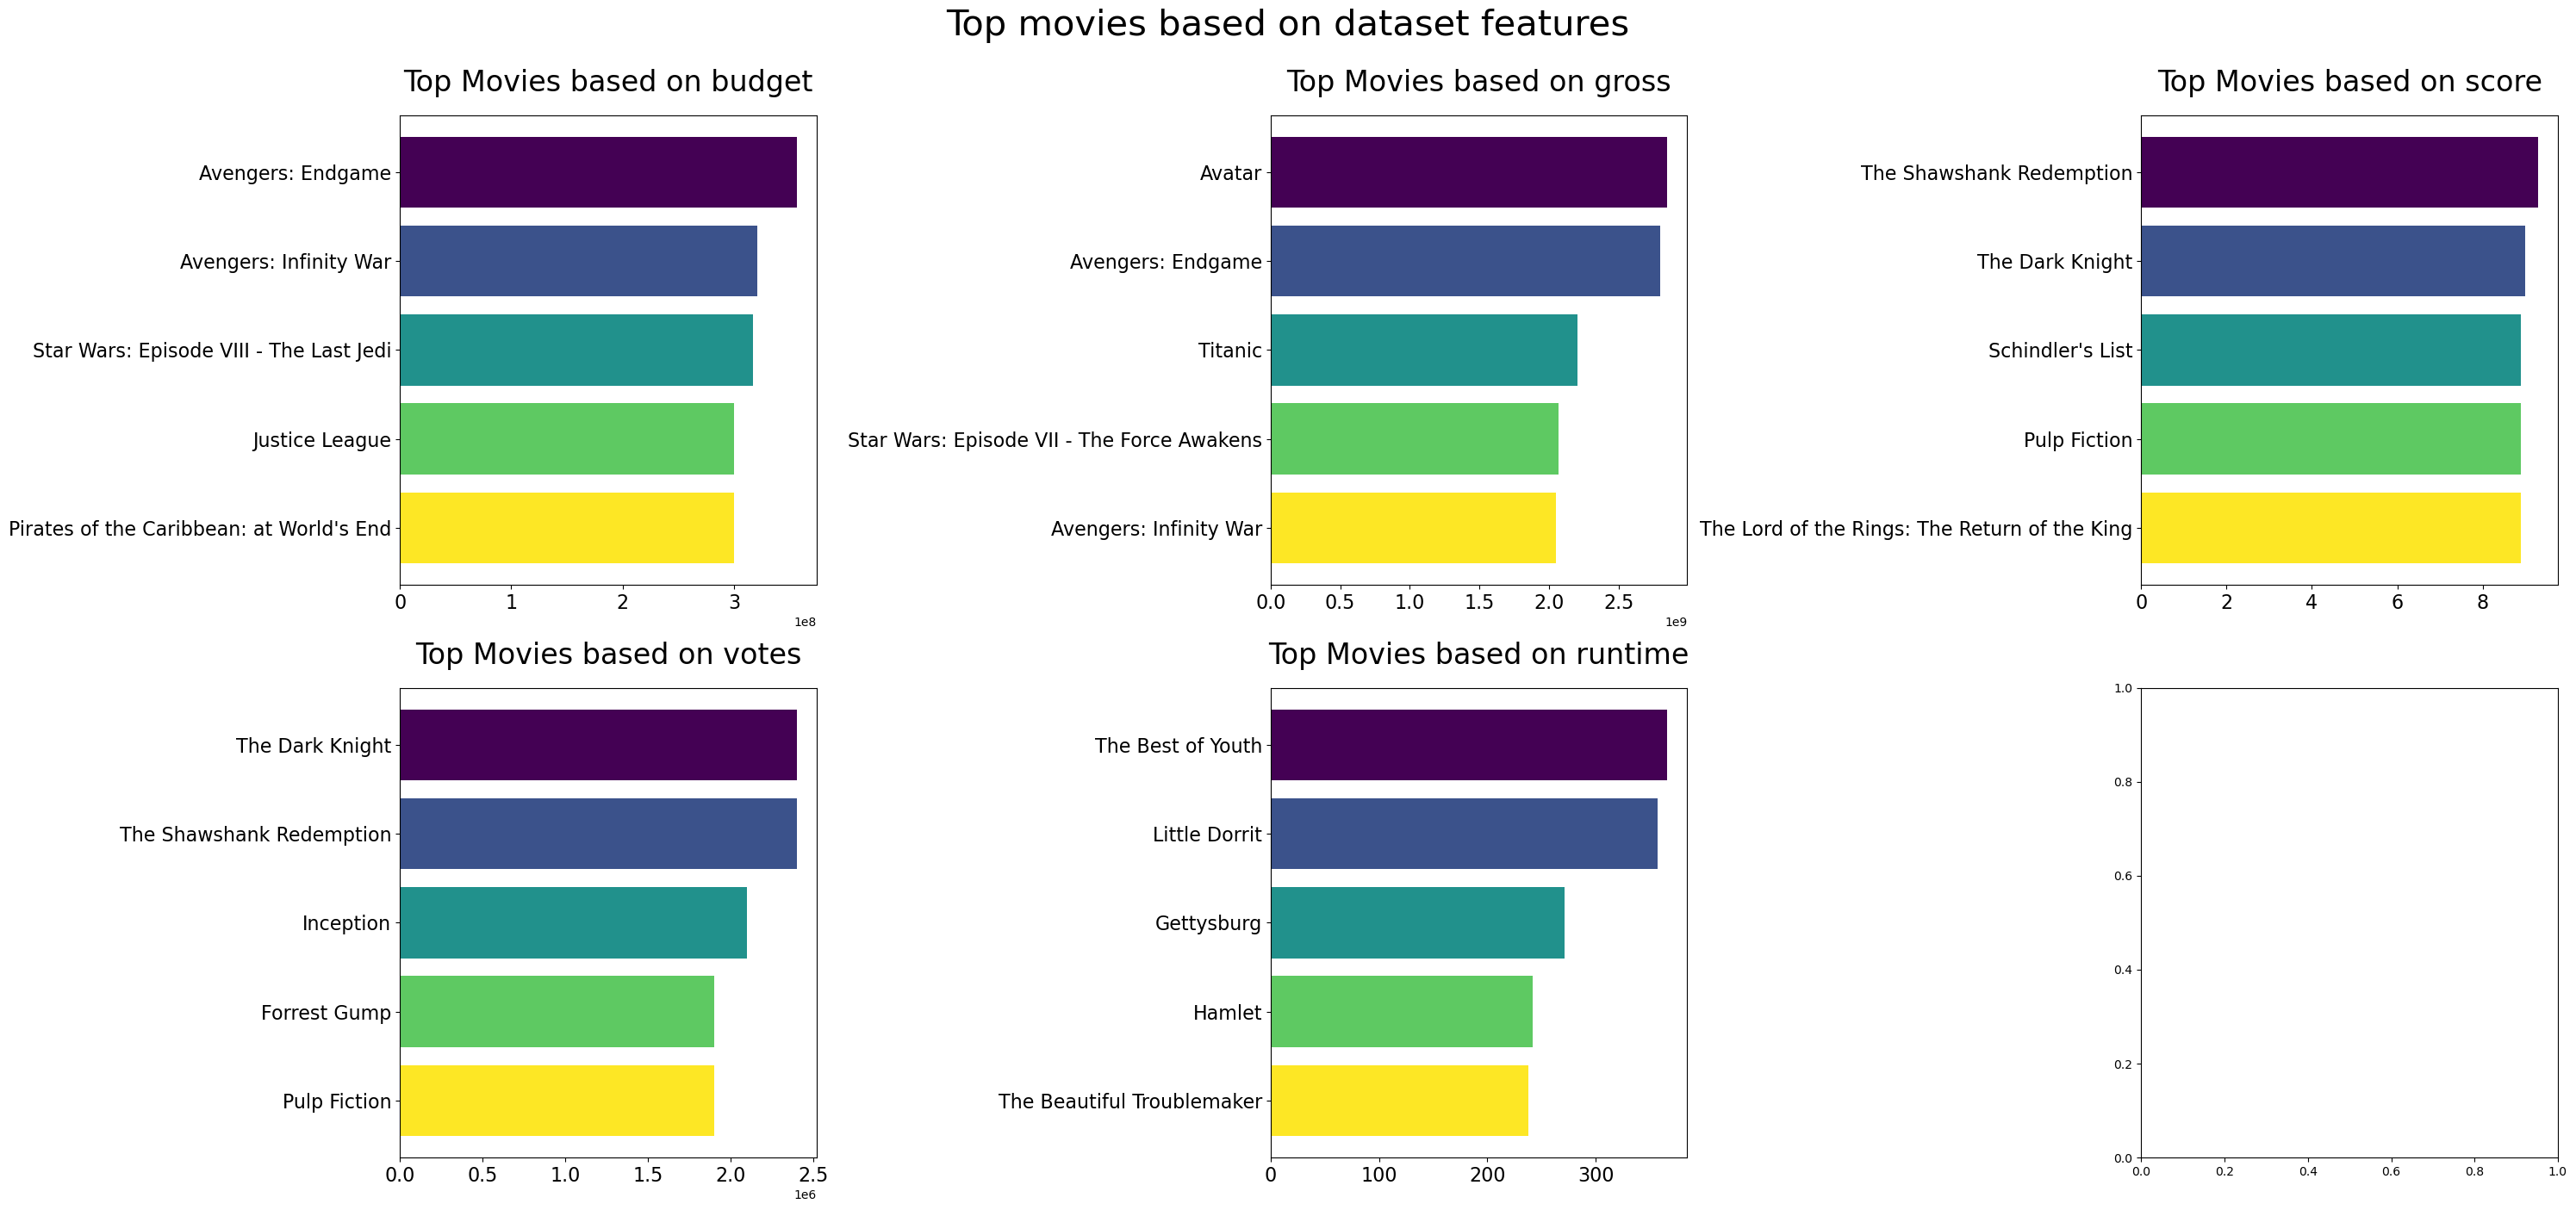

In [78]:
top_movie_num = 5
top_movies_based_on = ["budget", "gross", "score","votes","runtime"]

fig, ax = plt.subplots(2, 3, figsize=(30,14))
ax = ax.flatten()
colors = plt.cm.get_cmap('viridis', top_movie_num)

for i in range(5):
    col = top_movies_based_on[i]
    top_movies_by = df.sort_values(by=[col], ascending=False).head(top_movie_num)
    ax[i].barh(top_movies_by["name"], top_movies_by[col], color=colors.colors)
    ax[i].set_title(f"Top Movies based on {col}", fontsize=24, pad=20)
    ax[i].tick_params(axis='both', which='major', labelsize=16)
    ax[i].invert_yaxis()    
    
plt.suptitle('Top movies based on dataset features',fontsize=30, y=1)
fig.tight_layout()

# Directors and Writers

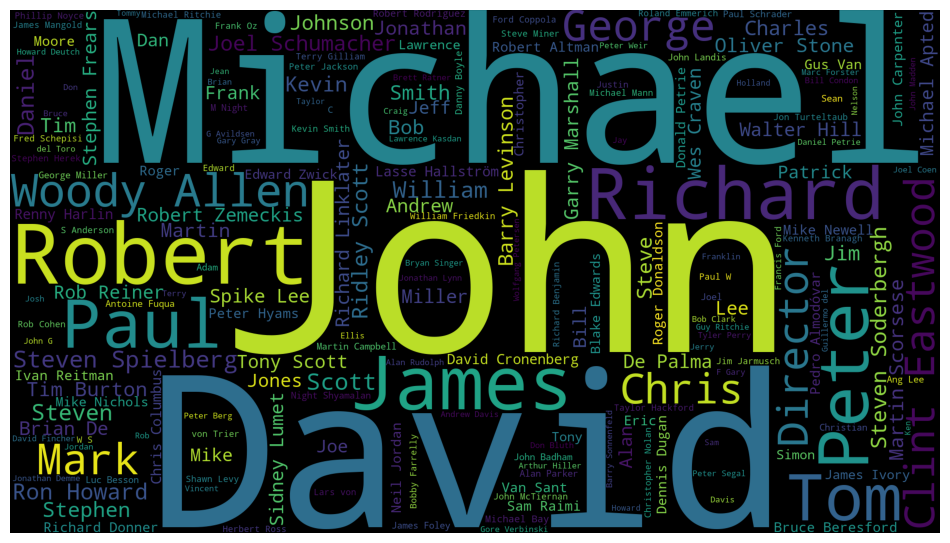

In [41]:
plt.subplots(figsize=(12,8))
text = " ".join(i for i in df.director)
wordcloud = WordCloud(background_color='Black', width=1920,height=1080).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

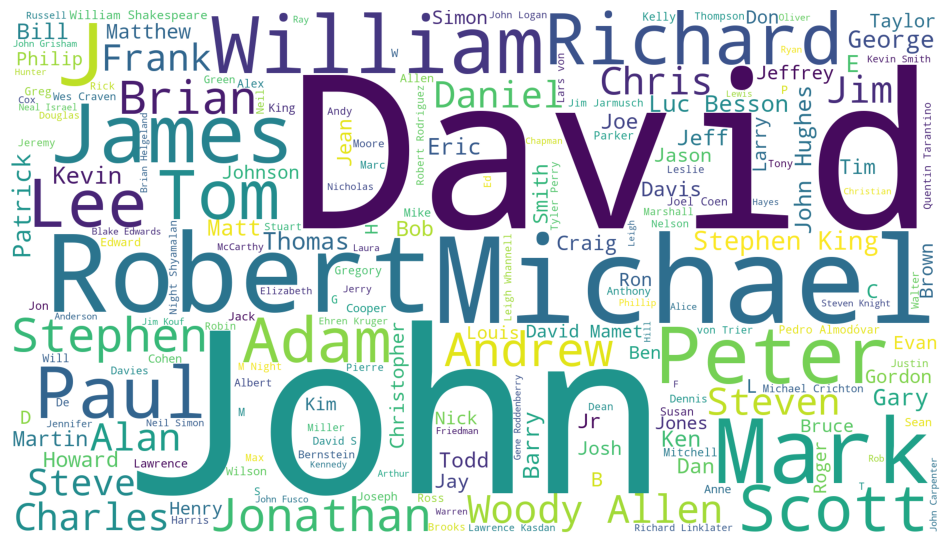

In [53]:
plt.subplots(figsize=(12,8))
df['writer'] = df['writer'].fillna("No")
text = " ".join(i for i in df.writer)
wordcloud = WordCloud(background_color='White', width=1920,height=1080).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Genre and Rating

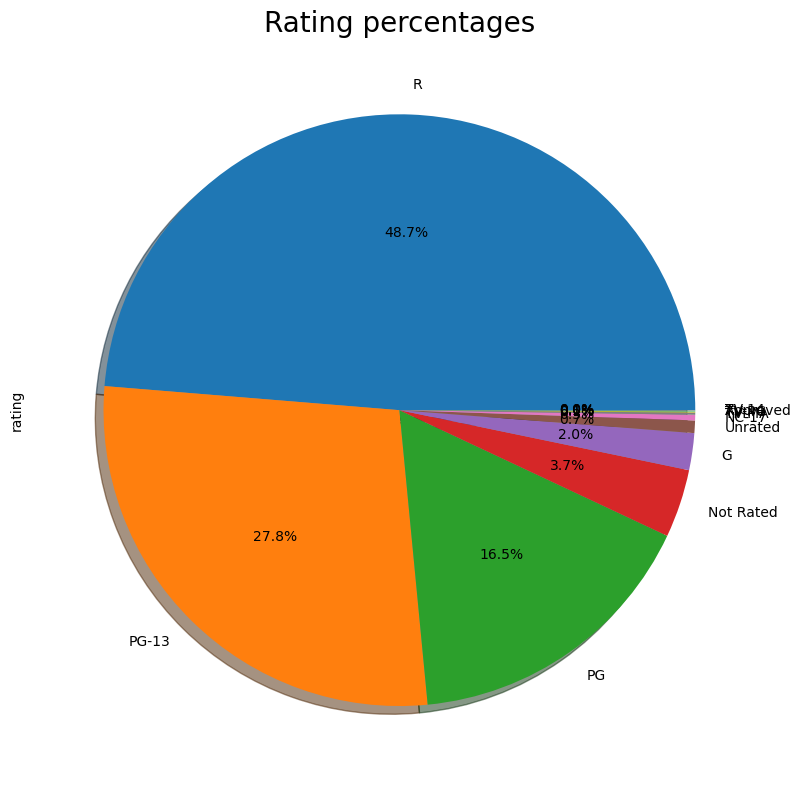

In [94]:
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title('Rating percentages', fontsize = 20)
plt.tight_layout()
plt.show()

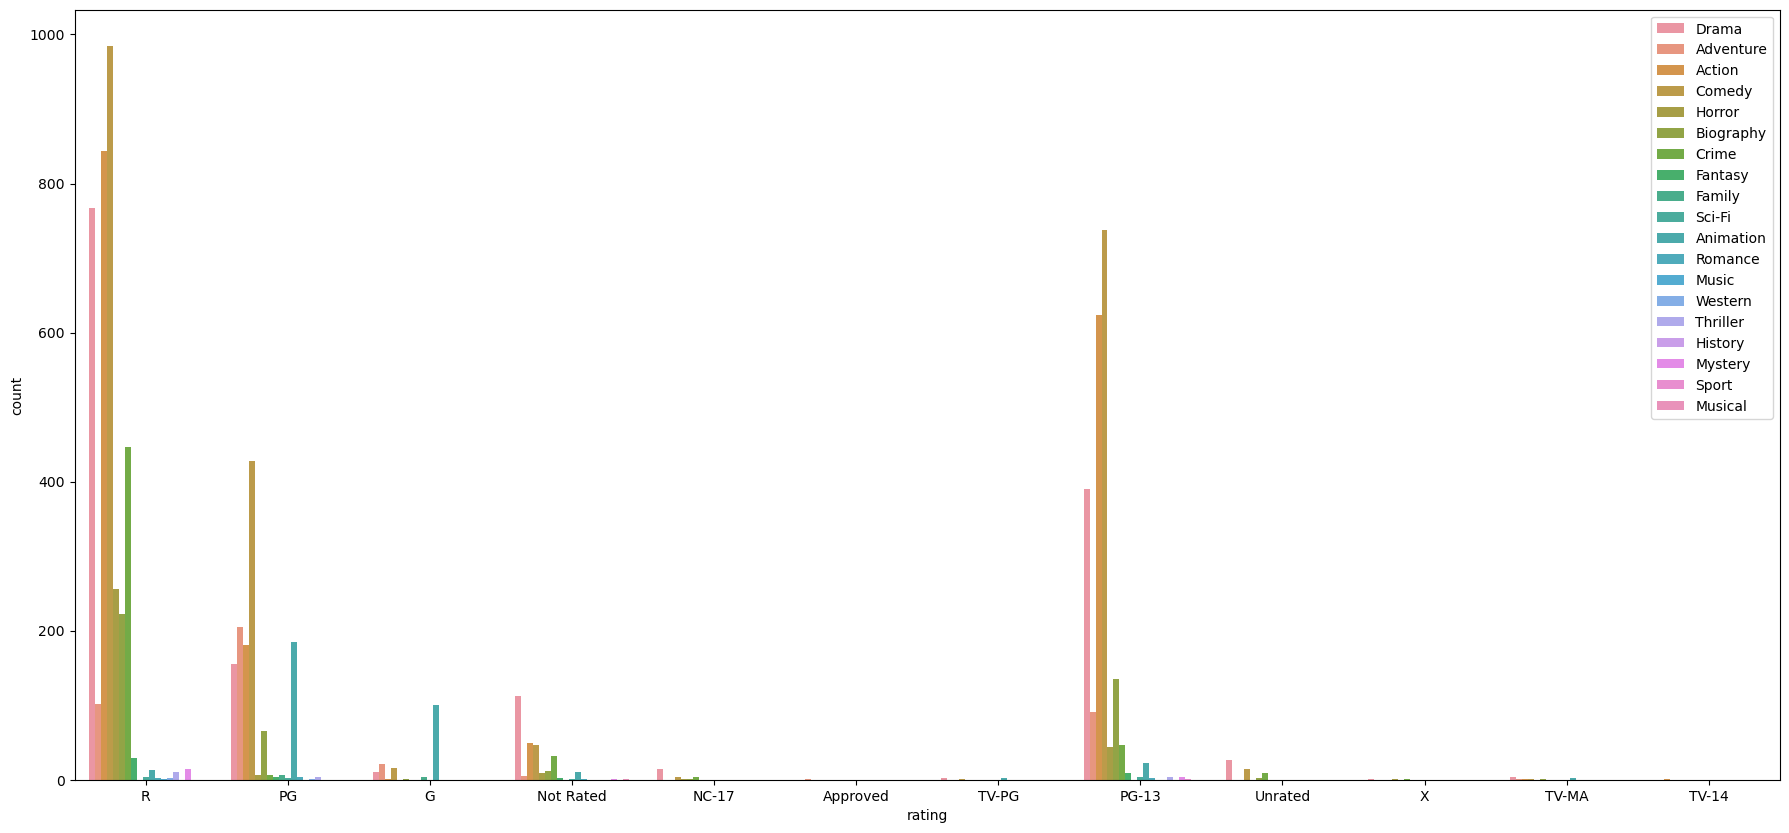

In [96]:
plt.figure(figsize = (22,10))
sns.countplot(x = 'rating',data = df,hue='genre')
plt.legend(loc='upper right')
plt.show()

<Axes: >

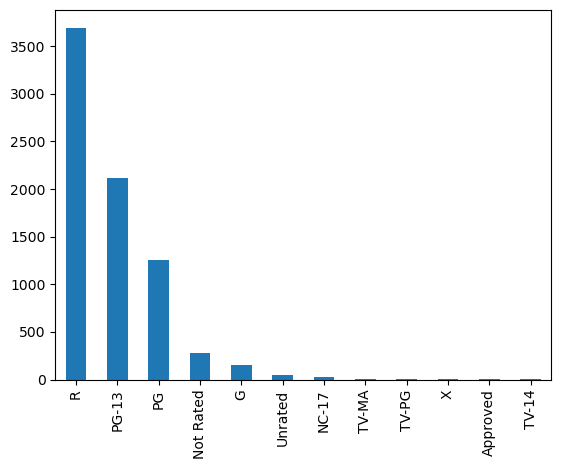

In [105]:
df['rating'].value_counts().plot.bar()

# Runtime and Score Distribution

In [74]:
x1 = df['runtime'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['Runtime'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Runtime with normal distribution')
fig.show()

In [75]:
x2 = df['score'].fillna(0.0).astype(float)
fig = ff.create_distplot([x2], ['Score'], bin_size=0.1, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Score with normal distribution')
fig.show()

# Company Analysis

In [83]:
df.groupby('company').size()

company
"DIA" Productions GmbH & Co. KG        1
"Weathering With You" Film Partners    1
.406 Production                        1
1+2 Seisaku Iinkai                     1
10 West Studios                        1
                                      ..
i am OTHER                             1
i5 Films                               1
iDeal Partners Film Fund               1
micro_scope                            1
thefyzz                                1
Length: 2385, dtype: int64

In [84]:
company = df['company'].value_counts()
company = pd.DataFrame(company)
company = company.head(10)
company

company
Universal Pictures             377
Warner Bros.                   334
Columbia Pictures              332
Paramount Pictures             320
Twentieth Century Fox          240
New Line Cinema                174
Touchstone Pictures            132
Metro-Goldwyn-Mayer (MGM)      125
Walt Disney Pictures           123
TriStar Pictures                94

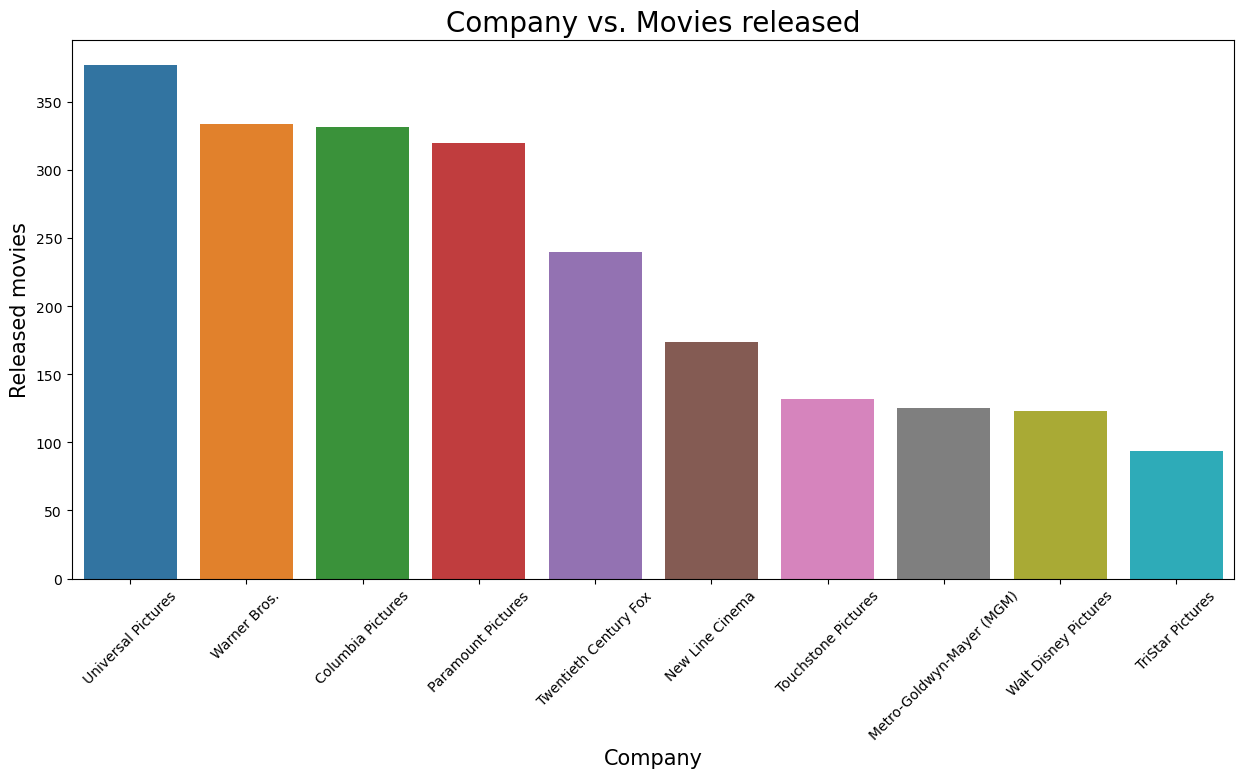

In [116]:
sns.barplot(x = company.index, y = company['company'])

labels = company.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Company vs. Movies released', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = 45)
plt.show()

# Correlation Matrix

We're going to generate the correlation matrices based on different methods

In [19]:
df.corr(method ='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

In [20]:
df.corr(method ='kendall')

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.224120  0.200618  0.097184
score    0.067652  1.000000  0.300115 -0.000566  0.086046  0.283611
votes    0.331465  0.300115  1.000000  0.353702  0.548899  0.198240
budget   0.224120 -0.000566  0.353702  1.000000  0.512637  0.235483
gross    0.200618  0.086046  0.548899  0.512637  1.000000  0.168933
runtime  0.097184  0.283611  0.198240  0.235483  0.168933  1.000000

In [21]:
df.corr(method ='spearman')

year     score     votes    budget     gross   runtime
year     1.000000  0.099045  0.469829  0.317336  0.293084  0.142977
score    0.099045  1.000000  0.428138 -0.001403  0.126116  0.399857
votes    0.469829  0.428138  1.000000  0.502466  0.742050  0.290159
budget   0.317336 -0.001403  0.502466  1.000000  0.693670  0.336370
gross    0.293084  0.126116  0.742050  0.693670  1.000000  0.246243
runtime  0.142977  0.399857  0.290159  0.336370  0.246243  1.000000

Plot the correlation matrix

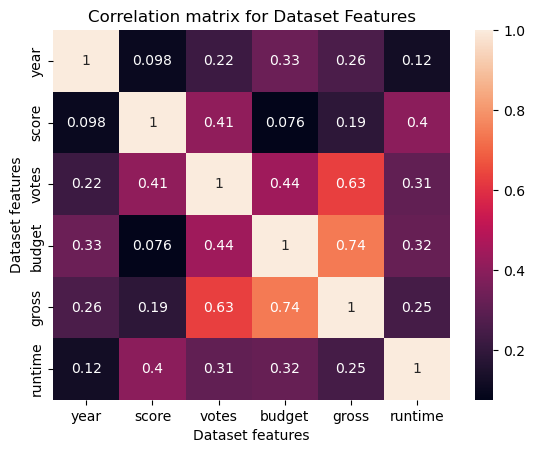

In [23]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Dataset Features")
plt.xlabel("Dataset features")
plt.ylabel("Dataset features")
plt.show()

In [106]:
df.head(10)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

                            released  score      votes            director  \
0      June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1       July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2      June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3       July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4      July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5        May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6      June 20, 1980 (United States)    7.9   188000.0         John Landis   
7  December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8      June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9       May 16, 1980 (United States)    7.0    10000.0         Walter Hill   

                    writer star         country      budget        gross  \
0             Stephen King   No  United Kingdom  19000000.0   46998772.0   
1  Henry De Vere Stacpoole   No   United States   4500000.0   58853106.0   
2           Leigh Brackett   No   United States  18000000.0  538375067.0   
3             Jim Abrahams   No   United States   3500000.0   83453539.0   
4       Brian Doyle-Murray   No   United States   6000000.0   39846344.0   
5            Victor Miller   No   United States    550000.0   39754601.0   
6              Dan Aykroyd   No   United States  27000000.0  115229890.0   
7             Jake LaMotta   No   United States  18000000.0   23402427.0   
8             Jerry Siegel   No   United States  54000000.0  108185706.0   
9              Bill Bryden   No   United States  10000000.0   15795189.0   

                        company  runtime  
0                  Warner Bros.    146.0  
1             Columbia Pictures    104.0  
2                     Lucasfilm    124.0  
3            Paramount Pictures     88.0  
4                Orion Pictures     98.0  
5            Paramount Pictures     95.0  
6            Universal Pictures    133.0  
7  Chartoff-Winkler Productions    129.0  
8                Dovemead Films    127.0  
9                United Artists    100.0

In [107]:
df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name      1.000000  0.143938  0.036367  0.965761  0.959015 -0.046733   
rating    0.143938  1.000000 -0.086723  0.156713  0.146606  0.012595   
genre     0.036367 -0.086723  1.000000  0.037184  0.035940 -0.002437   
year      0.965761  0.156713  0.037184  1.000000  0.993190 -0.044981   
released  0.959015  0.146606  0.035940  0.993190  1.000000 -0.045761   
score    -0.046733  0.012595 -0.002437 -0.044981 -0.045761  1.000000   
votes     0.287776  0.099972  0.023285  0.312401  0.299905 -0.009749   
director  0.745905  0.085520  0.047288  0.770497  0.770876 -0.022687   
writer    0.805801  0.104120  0.033933  0.825351  0.820213 -0.035031   
star           NaN       NaN       NaN       NaN       NaN       NaN   
country   0.142828  0.000494 -0.015795  0.140216  0.148468  0.023097   
budget    0.277488  0.193353  0.073008  0.300621  0.285691 -0.012642   
gross     0.947324  0.158582  0.038616  0.980873  0.976423 -0.047041   
company   0.591667 -0.028035  0.009566  0.601571  0.607954 -0.028432   
runtime   0.048955  0.032741  0.001462  0.050647  0.048235  0.026436   

             votes  director    writer  star   country    budget     gross  \
name      0.287776  0.745905  0.805801   NaN  0.142828  0.277488  0.947324   
rating    0.099972  0.085520  0.104120   NaN  0.000494  0.193353  0.158582   
genre     0.023285  0.047288  0.033933   NaN -0.015795  0.073008  0.038616   
year      0.312401  0.770497  0.825351   NaN  0.140216  0.300621  0.980873   
released  0.299905  0.770876  0.820213   NaN  0.148468  0.285691  0.976423   
score    -0.009749 -0.022687 -0.035031   NaN  0.023097 -0.012642 -0.047041   
votes     1.000000  0.192220  0.224093   NaN -0.045914  0.398519  0.286180   
director  0.192220  1.000000  0.748875   NaN  0.155471  0.106617  0.750911   
writer    0.224093  0.748875  1.000000   NaN  0.157597  0.187041  0.806158   
star           NaN       NaN       NaN   NaN       NaN       NaN       NaN   
country  -0.045914  0.155471  0.157597   NaN  1.000000 -0.082082  0.133982   
budget    0.398519  0.106617  0.187041   NaN -0.082082  1.000000  0.285832   
gross     0.286180  0.750911  0.806158   NaN  0.133982  0.285832  1.000000   
company   0.008900  0.552258  0.546875   NaN  0.226346 -0.092249  0.588156   
runtime   0.106024 -0.011070  0.032396   NaN  0.124154  0.112097  0.042978   

           company   runtime  
name      0.591667  0.048955  
rating   -0.028035  0.032741  
genre     0.009566  0.001462  
year      0.601571  0.050647  
released  0.607954  0.048235  
score    -0.028432  0.026436  
votes     0.008900  0.106024  
director  0.552258 -0.011070  
writer    0.546875  0.032396  
star           NaN       NaN  
country   0.226346  0.124154  
budget   -0.092249  0.112097  
gross     0.588156  0.042978  
company   1.000000  0.005137  
runtime   0.005137  1.000000

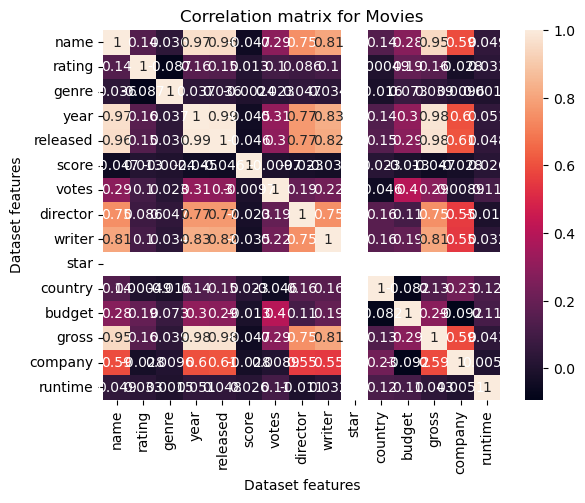

In [110]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movies")
plt.xlabel("Dataset features")
plt.ylabel("Dataset features")
plt.show()

In [111]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
corr_pairs.head(100)

name   name        1.000000
       rating      0.143938
       genre       0.036367
       year        0.965761
       released    0.959015
                     ...   
votes  score      -0.009749
       votes       1.000000
       director    0.192220
       writer      0.224093
       star             NaN
Length: 100, dtype: float64

In [112]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
corr_pairs.head(100)

name   name        1.000000
       rating      0.143938
       genre       0.036367
       year        0.965761
       released    0.959015
                     ...   
votes  score      -0.009749
       votes       1.000000
       director    0.192220
       writer      0.224093
       star             NaN
Length: 100, dtype: float64

In [114]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.7]
strong_pairs.head(30)

name      director    0.745905
director  name        0.745905
writer    director    0.748875
director  writer      0.748875
          gross       0.750911
gross     director    0.750911
director  year        0.770497
year      director    0.770497
released  director    0.770876
director  released    0.770876
writer    name        0.805801
name      writer      0.805801
gross     writer      0.806158
writer    gross       0.806158
released  writer      0.820213
writer    released    0.820213
          year        0.825351
year      writer      0.825351
gross     name        0.947324
name      gross       0.947324
          released    0.959015
released  name        0.959015
name      year        0.965761
year      name        0.965761
gross     released    0.976423
released  gross       0.976423
year      gross       0.980873
gross     year        0.980873
year      released    0.993190
released  year        0.993190
dtype: float64

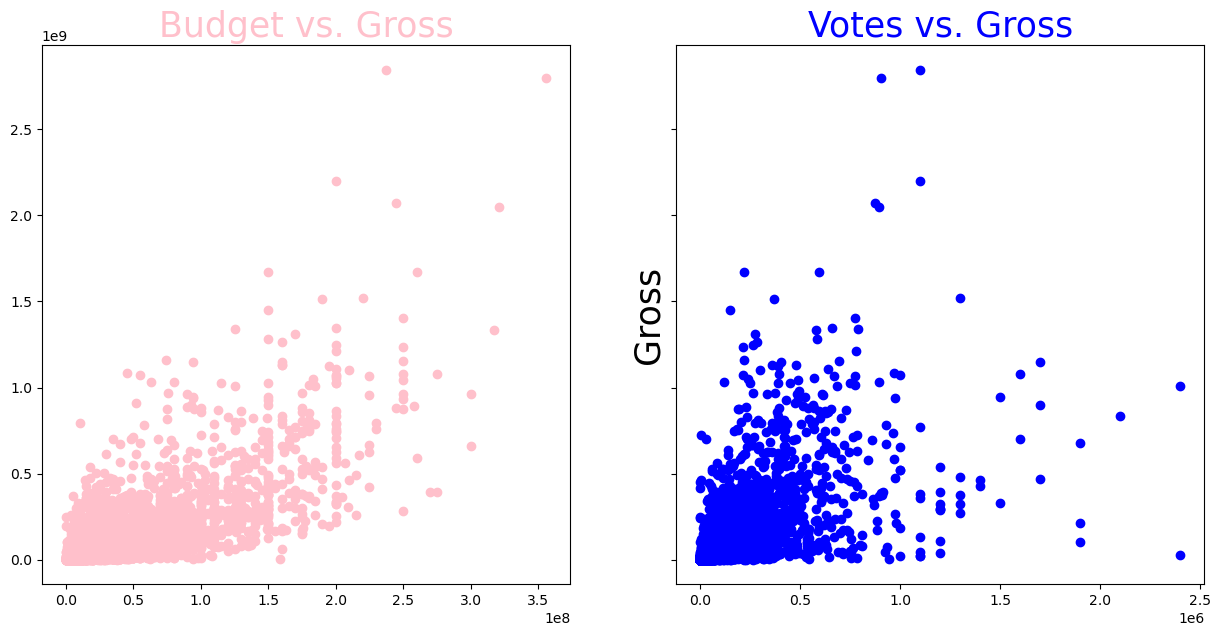

In [115]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

plt.gcf().set_size_inches(15, 7)
ax1.scatter(df.budget, df.gross, c = 'pink')
ax1.set_title('Budget vs. Gross', c = 'pink', fontsize = 25)
ax2.scatter(df.votes, df.gross, c='blue')
ax2.set_title('Votes vs. Gross', c ='blue', fontsize = 25)

plt.ylabel('Gross', fontsize = 25)

plt.show()

# Relation between Rating and Gross

<Axes: xlabel='gross', ylabel='rating'>

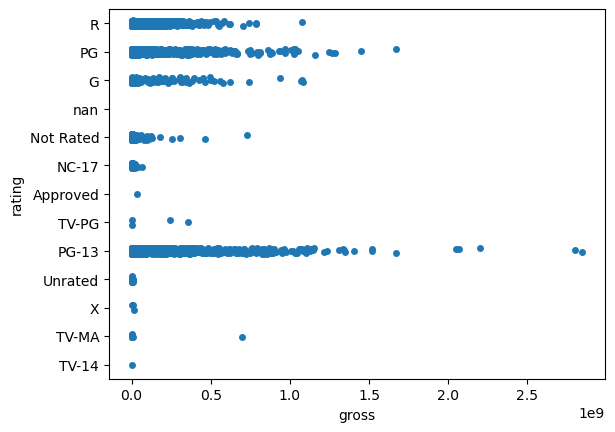

In [80]:
sns.stripplot(x="gross", y="rating", data=df)